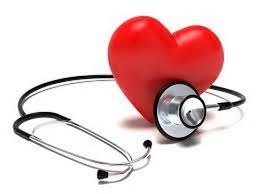

In [7]:
from IPython.display import Image
Image("images.jpeg")

In [ ]:
Heart disease classification

-age
-sex: 1=male, 0=female
-cp: The chest pain experienced (Value 1: typical angina, Value 2: atypical angina, Value 3: non-anginal pain, Value 4: asymptomatic)
-trestbps: The person's resting blood pressure (mm Hg on admission to the hospital)
-chol: The person's cholmesterol measurement in mg/dl
-fbs: The person's fasting blood sugar (> 120 mg/dl, 1 = true; 0 = false)
-restecg: Resting electrocardiographic measurement (0 = normal, 1 = having ST-T wave abnormality, 2 = showing probable or definite left ventricular hypertrophy by Estes' criteria)
-thalach: The person's maximum heart rate achieved
-exang: Exercise induced angina (1 = yes; 0 = no)
-oldpeak: ST depression induced by exercise relative to rest ('ST' relates to positions on the ECG plot).
-slope: the slope of the peak exercise ST segment (Value 1: upsloping, Value 2: flat, Value 3: downsloping)
-ca: The number of major vessels (0-3)
-thal: A blood disorder called thalassemia (3 = normal; 6 = fixed defect; 7 =reversable defect)


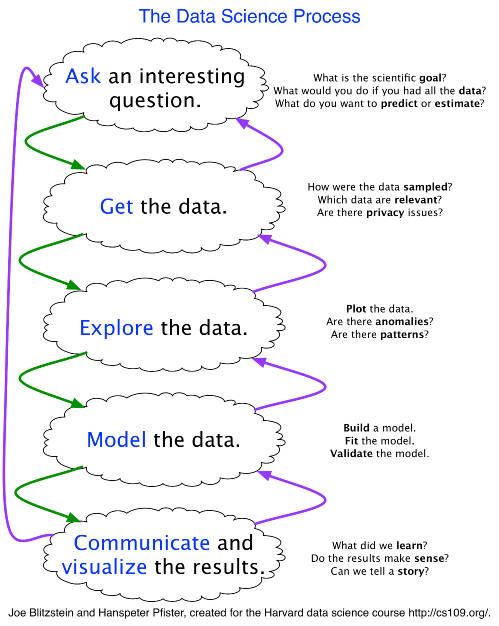

In [5]:
Image("data-science-process.jpg")

In [451]:
#import libraries
import pandas as pd
from collections import Counter
import numpy as np
import seaborn as sns
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt # Plot the graphes
%matplotlib inline
from sklearn.metrics import classification_report,confusion_matrix
from sklearn import preprocessing
import seaborn as sns
from sklearn.preprocessing import StandardScaler as ss
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
sns.set()
import sklearn.metrics as metrics
from fancyimpute import IterativeImputer as MICE
import xgboost as xgb
from sklearn.preprocessing import StandardScaler 

In [452]:
heart_df=pd.read_csv("processed.cleveland.csv",
           names=['age','sex','chest_pain','resting_blood_pressure','cholesterol',
            'fasting_blood_sugar','rest_ecg_measurements','maximum_heart_rate',
            'ex_induced_angina','ST_depression','ST_slope','num_major_vessels',
            'thalassemia','target'
           ],na_values=['?'],header=None)

EDA:Exploratory Data Analysis

In [47]:
heart_df.isnull().sum()

age                       0
sex                       0
chest_pain                0
resting_blood_pressure    0
cholesterol               0
fasting_blood_sugar       0
rest_ecg_measurements     0
maximum_heart_rate        0
ex_induced_angina         0
ST_depression             0
ST_slope                  0
num_major_vessels         4
thalassemia               2
target                    0
dtype: int64

In [185]:
heart_df[heart_df.num_major_vessels.isnull()]

,age,sex,chest_pain,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg_measurements,maximum_heart_rate,ex_induced_angina,ST_depression,ST_slope,num_major_vessels,thalassemia,target
166,52,1,3,138,223,0,0,169,0,0.0,1,NaN,3.0,0
192,43,1,4,132,247,1,2,143,1,0.1,2,NaN,7.0,1
287,58,1,2,125,220,0,0,144,0,0.4,2,NaN,7.0,0
302,38,1,3,138,175,0,0,173,0,0.0,1,NaN,3.0,0


In [453]:
#we can see that we have three missing values of num_major_vessels in class 0 and 1 in class 1
#similarly 1 missing values in class 0 for Thalassemia and 1 for class 1.
heart_df.groupby('target').count()

,age,sex,chest_pain,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg_measurements,maximum_heart_rate,ex_induced_angina,ST_depression,ST_slope,num_major_vessels,thalassemia
target,,,,,,,,,,,,,
0,164,164,164,164,164,164,164,164,164,164,164,161,163
1,55,55,55,55,55,55,55,55,55,55,55,54,55
2,36,36,36,36,36,36,36,36,36,36,36,36,35
3,35,35,35,35,35,35,35,35,35,35,35,35,35
4,13,13,13,13,13,13,13,13,13,13,13,13,13


In [455]:
print(Counter(heart_df.target))

Counter({0: 164, 1: 55, 2: 36, 3: 35, 4: 13})


Impute missing values

In [454]:
#Lets consider class0, class1,class2 only, as only these classes have NaN values
class0=heart_df[heart_df.target==0]
class1=heart_df[heart_df.target==1]
class2=heart_df[heart_df.target==2]

In [456]:
class0mean_vessels=heart_df[heart_df.target==0].num_major_vessels.mean()
class0mean_vessels

0.2732919254658385

In [457]:
class1mean_vessels=heart_df[heart_df.target==1].num_major_vessels.mean()
class1mean_vessels

0.7407407407407407

In [458]:
val0_vessels=round(class0mean_vessels)
val1_vessels=round(class1mean_vessels)

In [ ]:
class0.num_major_vessels.fillna(val0_vessels,axis=0,inplace=True)
class1.num_major_vessels.fillna(val1_vessels,axis=0,inplace=True)

In [460]:
class0mean_talassemia=heart_df[heart_df.target==0].thalassemia.mean()
class2mean_talassemia=heart_df[heart_df.target==2].thalassemia.mean()

In [461]:
val0_talssemia=int(class0mean_talassemia)
val2_talassemia=int(class2mean_talassemia)

In [ ]:
class0.thalassemia.fillna(val0_talssemia,axis=0,inplace=True)
class2.thalassemia.fillna(val2_talassemia,axis=0,inplace=True)

In [463]:
heart_df = heart_df[heart_df.target != 0] 
heart_df = heart_df[heart_df.target != 1] 
heart_df = heart_df[heart_df.target != 2]

In [ ]:
heart_df.target[heart_df.target==2] = 1
heart_df.target[heart_df.target==3] = 1
heart_df.target[heart_df.target==4] = 1

In [465]:
class2.target[class2.target==2] = 1

In [466]:
heart_data=pd.concat([class0,class1,class2,heart_df])

In [467]:

print(Counter(heart_data.target))

Counter({0: 164, 1: 139})


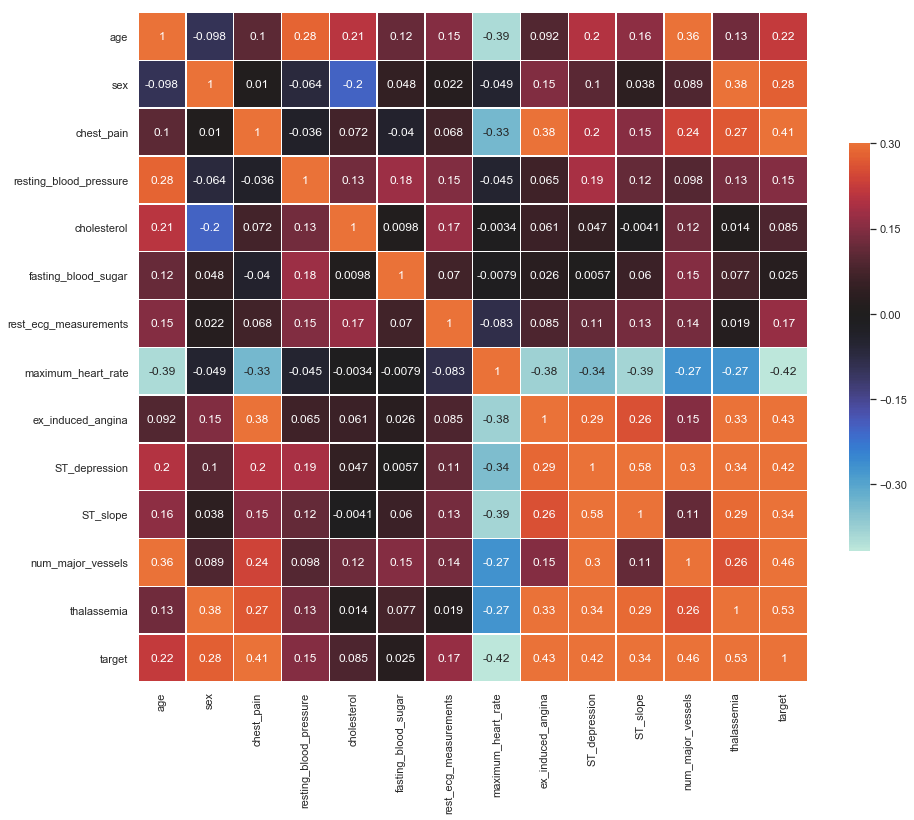

In [468]:
plt.figure(figsize=(15,15))
sns.heatmap(heart_data.corr(),vmax=.3,center=0,square=True,linewidths=.5,cbar_kws={"shrink":.5},annot=True)
plt.show()

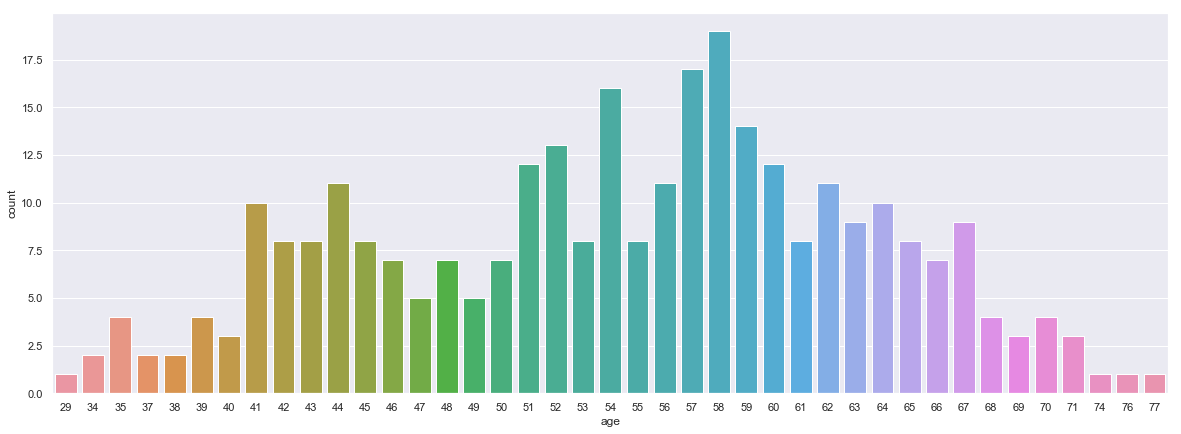

In [469]:
plt.figure(figsize=(20,7))
sns.set()
sns.countplot(heart_data.age)

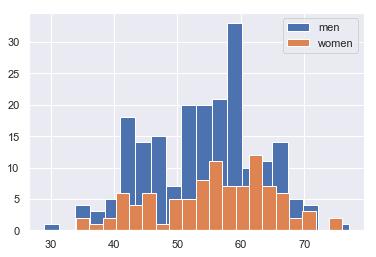

In [470]:
#1=male,0=female
heart_data[heart_data.sex==1].age.hist(bins=20,label='men');
heart_data[heart_data.sex==0].age.hist(bins=20,label='women');
plt.legend(loc='upper right')
plt.show()

In [ ]:
#male/female age distribution in sample is equal, but different in count. It can be important.

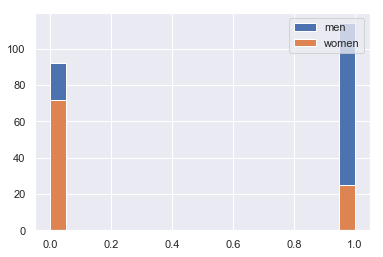

In [471]:
#1=male,0=female
heart_data[heart_data.sex==1].target.hist(bins=20,label='men');
heart_data[heart_data.sex==0].target.hist(bins=20,label='women');
plt.legend(loc='upper right')
plt.show()

Men have disease:  0.18932038834951456
Women have disease:  0.09278350515463918


/Users/aydafarhadi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
/Users/aydafarhadi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


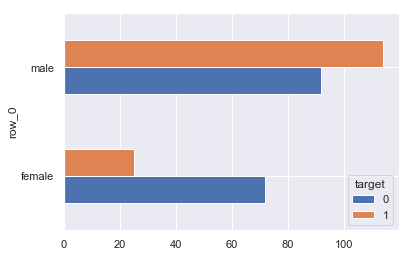

In [472]:
sex_str = np.where(heart_data.sex==1, 'male', 'female')
pd.crosstab(sex_str, heart_data.target).plot(kind='barh');

print("Men have disease: ",heart_df[(heart_data.sex==1)&(heart_data.target==1)].shape[0]/heart_data[(heart_data.sex==1)].shape[0])
print("Women have disease: ",heart_df[(heart_data.sex==0)&(heart_data.target==1)].shape[0]/heart_data[(heart_data.sex==0)].shape[0])

In [473]:
heart_data.head()

,age,sex,chest_pain,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg_measurements,maximum_heart_rate,ex_induced_angina,ST_depression,ST_slope,num_major_vessels,thalassemia,target
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0
5,56,1,2,120,236,0,0,178,0,0.8,1,0.0,3.0,0
7,57,0,4,120,354,0,0,163,1,0.6,1,0.0,3.0,0


/Users/aydafarhadi/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


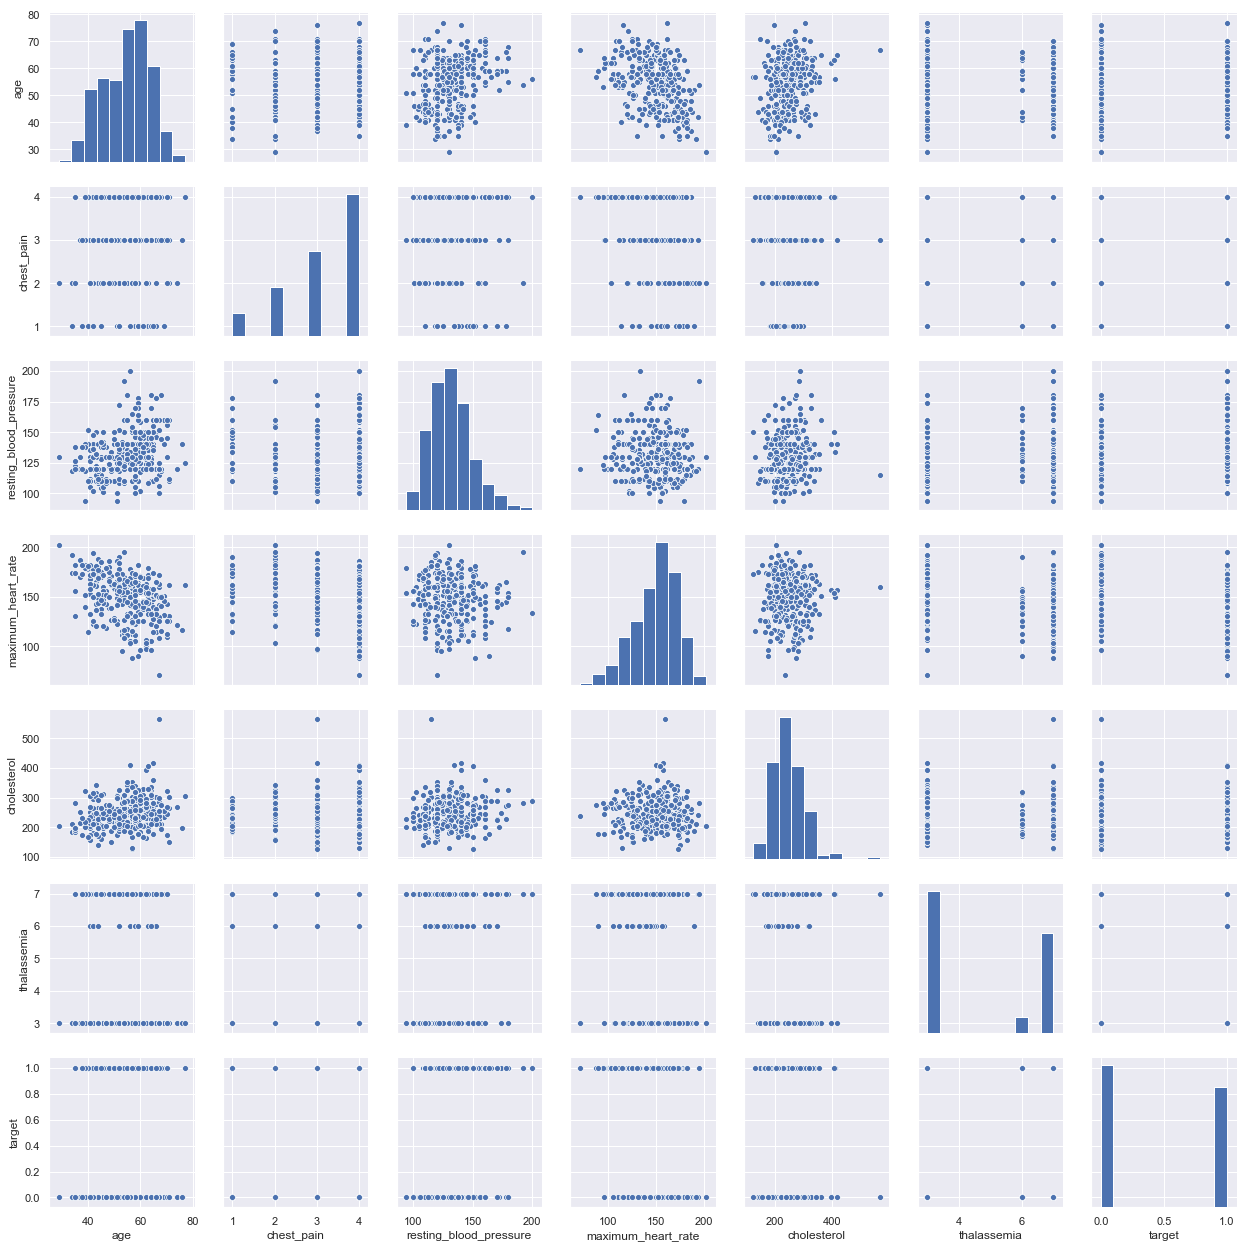

In [474]:
sns.pairplot(heart_data[['age','chest_pain','resting_blood_pressure','maximum_heart_rate','cholesterol','thalassemia','target']],size=2.5);

In [475]:
heart_data.astype('object').describe(include='all').loc['unique',:]

age                        41.0
sex                         2.0
chest_pain                  4.0
resting_blood_pressure     50.0
cholesterol               152.0
fasting_blood_sugar         2.0
rest_ecg_measurements       3.0
maximum_heart_rate         91.0
ex_induced_angina           2.0
ST_depression              40.0
ST_slope                    3.0
num_major_vessels           4.0
thalassemia                 3.0
target                      2.0
Name: unique, dtype: float64

Preprocessing :Prepare data for Machine learning model

In [ ]:
heart_data['sex']=heart_data.sex.map({0:'female',1:'male'})
heart_data['chest_pain'][heart_data['chest_pain']==1]='typical_angina'
heart_data['chest_pain'][heart_data['chest_pain']==2]='atypical_angina'
heart_data['chest_pain'][heart_data['chest_pain']==3]='non_angina'
heart_data['chest_pain'][heart_data['chest_pain']==4]='asymptotic'
heart_data['fasting_blood_sugar'][heart_data['fasting_blood_sugar']==0]='lower_120_mg/ml'
heart_data['fasting_blood_sugar'][heart_data['fasting_blood_sugar']==1]='higher_120_mg/ml'
heart_data['rest_ecg_measurements'][heart_data['rest_ecg_measurements']==0]='normal'
heart_data['rest_ecg_measurements'][heart_data['rest_ecg_measurements']==1]='ST_T_Wave_abnormal'
heart_data['rest_ecg_measurements'][heart_data['rest_ecg_measurements']==2]='ventricular_hypertrophy'
heart_data['ex_induced_angina'][heart_data['ex_induced_angina']==0]='no'
heart_data['ex_induced_angina'][heart_data['ex_induced_angina']==1]='yes'
heart_data['ST_slope'][heart_data['ST_slope']==1]='upsloping'
heart_data['ST_slope'][heart_data['ST_slope']==2]='flat'
heart_data['ST_slope'][heart_data['ST_slope']==3]='downsloping'
heart_data['thalassemia'][heart_data['thalassemia']==3]='normal'
heart_data['thalassemia'][heart_data['thalassemia']==6]='fix_defect'
heart_data['thalassemia'][heart_data['thalassemia']==7]='reversable_defect'

In [476]:
heart_data.head()

,age,sex,chest_pain,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg_measurements,maximum_heart_rate,ex_induced_angina,ST_depression,ST_slope,num_major_vessels,thalassemia,target
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0
5,56,1,2,120,236,0,0,178,0,0.8,1,0.0,3.0,0
7,57,0,4,120,354,0,0,163,1,0.6,1,0.0,3.0,0


In [374]:
df = pd.get_dummies(heart_data, drop_first=True)
#df = pd.get_dummies(heart_data, columns=["chest_pain", "thalassemia"])
df.head()

,age,resting_blood_pressure,cholesterol,maximum_heart_rate,ST_depression,num_major_vessels,target,sex_male,chest_pain_atypical_angina,chest_pain_non_angina,chest_pain_typical_angina,fasting_blood_sugar_lower_120_mg/ml,rest_ecg_measurements_normal,rest_ecg_measurements_ventricular_hypertrophy,ex_induced_angina_yes,ST_slope_flat,ST_slope_upsloping,thalassemia_normal,thalassemia_reversable_defect
0,63,145,233,150,2.3,0.0,0,1,0,0,1,0,0,1,0,0,0,0,0
3,37,130,250,187,3.5,0.0,0,1,0,1,0,1,1,0,0,0,0,1,0
4,41,130,204,172,1.4,0.0,0,0,1,0,0,1,0,1,0,0,1,1,0
5,56,120,236,178,0.8,0.0,0,1,1,0,0,1,1,0,0,0,1,1,0
7,57,120,354,163,0.6,0.0,0,0,0,0,0,1,1,0,1,0,1,1,0


In [375]:
X=df.drop(['target'],axis=1)
y=df.target
print('features', X.shape)
print('response',y.shape)

features (303, 18)
response (303,)


In [376]:
#split data into training set(%80) and test set(%20)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.2,random_state=500)
print("training data is",X_train.shape)
print("test data is", y_train.shape)

training data is (242, 18)
test data is (242,)


Lets try simple model

In [477]:
heart_X=heart_data.drop(['target'],axis=1)
y=heart_data.target
print('features', heart_X.shape)
print('response',y.shape)

features (303, 13)
response (303,)


In [478]:
X_train, X_test, y_train, y_test = train_test_split(heart_X,y, test_size=0.2,random_state=500)

Normalization (Min-Max Scalar) :
In this approach, the data is scaled to a fixed range — usually 0 to 1.
In contrast to standardization, the cost of having this bounded range is that we will end up with smaller standard deviations, 
which can suppress the effect of outliers. 
Thus MinMax Scalar is sensitive to outliers.

In [353]:
#min_max_scaler = preprocessing.MinMaxScaler().fit(X_train)
#X_train = min_max_scaler.transform(X_train)
#X_test= min_max_scaler.transform(X_test)

Standardization (Standard Scalar) :
standardization (or Z-score normalization) means centering the variable at zero and
standardizing the variance at 1. 
The procedure involves subtracting the mean of each observation and then dividing by the standard deviation

In [479]:
#By fitting the scaler on the full dataset prior to splitting, 
#information about the test set is used to transform the training set, which in turn is passed downstream.
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler()

In [ ]:
Feature Selection

Regularisation consists in adding a penalty to the different parameters of the machine learning model to reduce the freedom of the model and in other words to avoid overfitting.

In linear model regularisation, the penalty is applied over the coefficients that multiply each of the predictors. 
From the different types of regularisation, Lasso or L1 has the property that is able to shrink some of the coefficients to zero.

Therefore, that feature can be removed from the model.

In [480]:
sel_ = SelectFromModel(LogisticRegression(C=1, penalty='l1',solver='liblinear'))

In [481]:
sel_.fit(scaler.transform(X_train), y_train)

SelectFromModel(estimator=LogisticRegression(C=1, penalty='l1',
                                             solver='liblinear'))

In [482]:
X_train = sel_.transform(X_train)
X_test = sel_.transform(X_test)

Machine learning models

In [417]:
Logreg=LogisticRegression(random_state=101,solver='lbfgs',max_iter=500)
print("CV score", cross_val_score(Logreg,X_train,y_train,cv=3).mean())

CV score 0.838940329218107


/Users/aydafarhadi/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/Users/aydafarhadi/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/li

In [418]:
knn=KNeighborsClassifier(n_neighbors=3, leaf_size=1000,p=1)
print("CV score", cross_val_score(knn,X_train,y_train,cv=3).mean())

CV score 0.7108539094650205


In [419]:
svc=SVC(C=200,kernel='poly')
print("CV score", cross_val_score(svc,X_train,y_train,cv=3).mean())

CV score 0.7605967078189301


In [420]:
gnb= GaussianNB(var_smoothing=0.1)
print("CV score", cross_val_score(gnb,X_train,y_train,cv=3).mean())

CV score 0.68179012345679


In [421]:
NN=MLPClassifier(hidden_layer_sizes=[14,25],max_iter=2000)
print("CV score", cross_val_score(NN,X_train,y_train,cv=3).mean())

CV score 0.7566358024691358


In [423]:
dt=DecisionTreeClassifier(random_state=101)
print("CV score", cross_val_score(dt,X_train,y_train,cv=3).mean())

CV score 0.7358024691358024


In [424]:
#Ensemble Classifiers
rf=RandomForestClassifier(criterion='gini', n_estimators=100, max_depth=4)
print("CV score", cross_val_score(rf,X_train,y_train,cv=3).mean())

CV score 0.8141975308641975


In [425]:
xgboost=xgb.XGBClassifier(random_state=12)
print("CV score", cross_val_score(xgboost,X_train,y_train,cv=3).mean())

CV score 0.7852880658436213


In [299]:
#Tunning classifiers
svcGrid=SVC(gamma='auto',random_state=101)
svc_params={'C':[0.1,1,10,100], 'gamma':[1,0.1,0.01], 'kernel':['linear','rbf']}

In [483]:
rf_grid=RandomForestClassifier(random_state=101,n_jobs=-1)
rf_params={'bootstrap':[True,False],'max_depth':[10,30,50,100,None], 
           'max_features':['auto','sqrt'], 'min_samples_split':[2,5,10], 'min_samples_leaf':[1,2,4],
            'n_estimators':[100,500,750,1500]}

In [301]:
xgb_grid=xgb.XGBClassifier(random_state=42)
xgb_param={'bootstrap':[True,False],'learning_rate':[0.1,0.01,0.001],'max_depth':[10,30,50,100,None], 
           'max_features':['auto','sqrt'], 'min_samples_split':[2,8,10,20,40], 'min_samples_leaf':[1,3,5,7],
            'n_estimators':[100,250,550,1000],'subsample':[0.7,0.9,1]}

In [486]:
grid_search=GridSearchCV(estimator=rf_grid, param_grid=rf_params, cv=3, scoring='accuracy',n_jobs=-1,verbose=0)
grid_search.fit(X_train, y_train)
grid_search.best_params_

{'bootstrap': True,
 'max_depth': 10,
 'max_features': 'auto',
 'min_samples_leaf': 4,
 'min_samples_split': 10,
 'n_estimators': 1500}

In [487]:
best_grid=grid_search.best_estimator_
best_grid

RandomForestClassifier(max_depth=10, min_samples_leaf=4, min_samples_split=10,
                       n_estimators=1500, n_jobs=-1, random_state=101)

In [488]:
print("CV score", cross_val_score(best_grid,X_train,y_train,cv=3).mean())

CV score 0.8389917695473251


Choose model and make prediction

In [489]:
print("Random forest")
print("accuracy score")
print(metrics.accuracy_score(y_test,prediction))
print("Confusion metrix")
print(metrics.confusion_matrix(y_test,prediction))

Random forest
accuracy score
0.8032786885245902
Confusion metrix
[[28  2]
 [10 21]]


In [490]:
prediction

array([0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1])

In [ ]:
grid_search=GridSearchCV(estimator=xgb_grid, param_grid=xgb_param, cv=3, scoring='accuracy',n_jobs=-1,verbose=0)
grid_search.fit(X_train, y_train)
grid_search.best_params_

In [438]:
best_grid=grid_search.best_estimator_
best_grid

XGBClassifier(base_score=0.5, booster='gbtree', bootstrap=True,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.01, max_delta_step=0,
              max_depth=10, max_features='auto', min_child_weight=1,
              min_samples_leaf=1, min_samples_split=2, missing=nan,
              monotone_constraints='()', n_estimators=250, n_jobs=0,
              num_parallel_tree=1, random_state=42, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=0.7, tree_method='exact',
              validate_parameters=1, verbosity=None)

In [439]:
print("CV score", cross_val_score(best_grid,X_train,y_train,cv=3).mean())

[17:18:38] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:516: 
Parameters: { bootstrap, max_features, min_samples_leaf, min_samples_split } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:18:39] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:516: 
Parameters: { bootstrap, max_features, min_samples_leaf, min_samples_split } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:18:39] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:516: 
Parameters: { bootstrap, max_features, min_samples_leaf, min_samples_split } might not be used.

  This ma

In [440]:
prediction_xgb=best_grid.predict(X_test)

In [441]:
print("gradient boosting")
print("accuracy score")
print(metrics.accuracy_score(y_test,prediction_xgb))
print("Confusion metrix")
print(metrics.confusion_matrix(y_test,prediction_xgb))

gradient boosting
accuracy score
0.819672131147541
Confusion metrix
[[28  2]
 [ 9 22]]


In [443]:
prediction_xgb

array([0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1])

In [448]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[28  2]
 [ 9 22]]


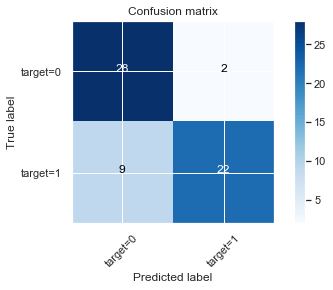

In [450]:
cnf_matrix = confusion_matrix(y_test, prediction_xgb, labels=[0,1])
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['target=0','target=1'],normalize= False,  title='Confusion matrix')